### HR Dashboard
Context:
This dataset comprises extensive data on company employees, encompassing their professional experience, personal characteristics, position they hold and employment-related variables. It offers a wealth of information for conducting diverse analyses in the realms of HR and workforce management, such as employee retention assessments, salary structure evaluations, diversity and inclusion investigations, and examinations of their feedback scores. The source of the dataset is not mentioned, we can assume that it was created to gain a comprehensive view into the dynamics of a particular workplace.

There are about 200 rows with 11 different columns.

**Varianbles**

Name: (Character type) Name of the employee

Age: (Character type) The age of each employee, providing demographic insights.

Gender: (Character type) Gender identity of employees, promoting diversity analysis.

Projects.Completed: (Integer type) Number of projects completed by each employee during their time at the company.

Productivity(%): (Integer type) Productivity rating of employee in percentage.

Satisfaction.Rate(%): (Integer type) rating of satisfactory work done by employee in percentage.

Feedback.Score: (Double type) Feedback value of employee.

Department: (Character type) department he/she is working in at the company.

Position: (Character type) position of the employee.

Joining.Date: (Character type) Joining month and year of the employee.

Salary: (Integer type) Salary of the employee in USD.

### Research Question:
What are the key defining factors behind salary? 

In [1]:
install.packages(c('dplyr', 'ggplot2', 'tidyverse', 'repr', 'infer', 
                   'cowplot', 'broom', 'GGally', 'leaps', 'car'))

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’





The downloaded binary packages are in
	/var/folders/69/n41lhlxd7zz7y66vhl2v1hcm0000gn/T//Rtmpa8xNVS/downloaded_packages


In [2]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
employee <- read.csv("hr_dashboard_data.csv")

In [4]:
head(employee)

,Name,Age,Gender,Projects.Completed,Productivity....,Satisfaction.Rate....,Feedback.Score,Department,Position,Joining.Date,Salary
,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
2,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
3,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
4,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
5,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
6,Jonathan King,24,Male,5,63,33,4.2,Sales,Junior Developer,Jan-21,48740


In [5]:
names(employee)

[1] "Name"                  "Age"                   "Gender"               
 [4] "Projects.Completed"    "Productivity...."      "Satisfaction.Rate...."
 [7] "Feedback.Score"        "Department"            "Position"             
[10] "Joining.Date"          "Salary"

In [6]:
summary(employee)

     Name                Age           Gender          Projects.Completed
 Length:200         Min.   :22.00   Length:200         Min.   : 0.00     
 Class :character   1st Qu.:26.00   Class :character   1st Qu.: 6.00     
 Mode  :character   Median :32.00   Mode  :character   Median :11.00     
                    Mean   :34.65                      Mean   :11.46     
                    3rd Qu.:41.00                      3rd Qu.:17.00     
                    Max.   :60.00                      Max.   :25.00     
 Productivity.... Satisfaction.Rate.... Feedback.Score   Department       
 Min.   : 0.00    Min.   :  0.00        Min.   :1.000   Length:200        
 1st Qu.:23.00    1st Qu.: 25.75        1st Qu.:1.900   Class :character  
 Median :45.00    Median : 50.50        Median :2.800   Mode  :character  
 Mean   :46.76    Mean   : 49.94        Mean   :2.883                     
 3rd Qu.:70.00    3rd Qu.: 75.25        3rd Qu.:3.900                     
 Max.   :98.00    Max.   :100.00

In [7]:
# Rename variable to have a humman readable.
new_col_name <- c("name", "age", "gender", "projects", "productivity", "satisfaction","feedback", "department", "position", "joiningdate", "salary")

names(employee) <- new_col_name

In [8]:
head(employee)

,name,age,gender,projects,productivity,satisfaction,feedback,department,position,joiningdate,salary
,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
2,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
3,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
4,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
5,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
6,Jonathan King,24,Male,5,63,33,4.2,Sales,Junior Developer,Jan-21,48740


### Boxplot Visualization

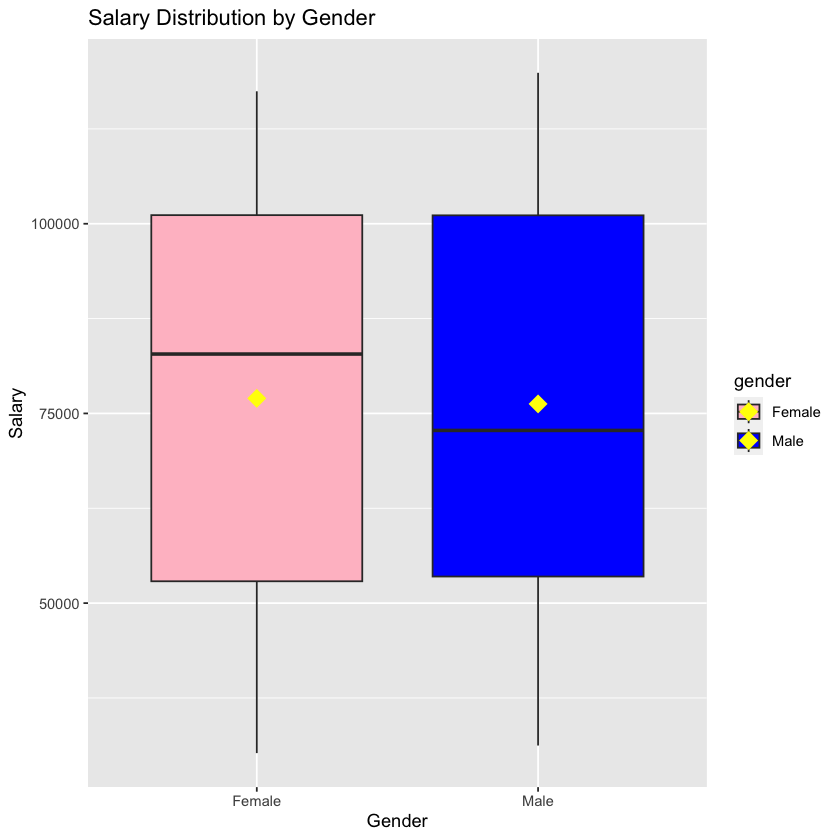

In [9]:
Salary_betweenGender_boxplot <- ggplot(employee, aes(x = gender, y = salary, fill = gender)) +
  geom_boxplot() +
  labs(x = "Gender", y = "Salary", title = "Salary Distribution by Gender") +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink"))+
stat_summary(aes(gender, salary, fill = gender),
    fun = mean, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )
Salary_betweenGender_boxplot

**Analysis of Salary Distribution by Gender Boxplot**

As the Salary_betweenGender_boxplot shows that the two boxplot almost perfectly overlapped and the mean salary of the male and female are almost same. The only obvious difference is the meidan value of salary that is the female median salary is approximately 10000 higher than the median male salary. It might mean there is almost no asscoication bewtween the salary and gender.

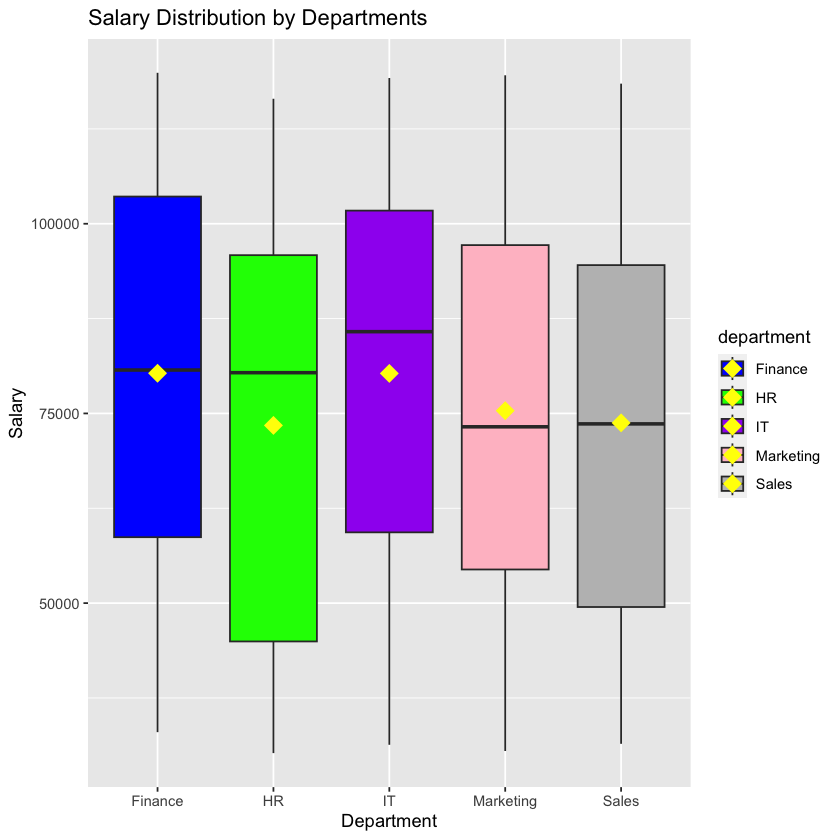

In [10]:
Salary_amongdepartment_boxplot <- ggplot(employee, aes(x = department, y = salary, fill = department)) +
  geom_boxplot() +
  labs(x = "Department", y = "Salary", title = "Salary Distribution by Departments") +
  scale_fill_manual(values = c("Finance" = "blue", "HR" = "Green", "IT" = "purple", "Marketing" = "pink", "Sales" = "Grey"))+
stat_summary(aes(department, salary, fill = department),
    fun = mean, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )
Salary_amongdepartment_boxplot

**Analysis of Salary Distribution by Departments Boxplot**

The side-by-side boxplot of Salary Distribution by Departments illustartes that there is not much difference in the quantile except the HR department. The lower quantile of the HR department is respectively much lower that the other department. In addition to that, there are also some differences among the median salary among the different departments. The meidan salary of the IT is the highest, then the finace and HR meidan salary is the secondly highest(They are approximately same). Lastly, the marketing and sales department are approximately same and they have the lowest meidan salary. In conclusin, the plot shows that there might be association between the salary and the department.

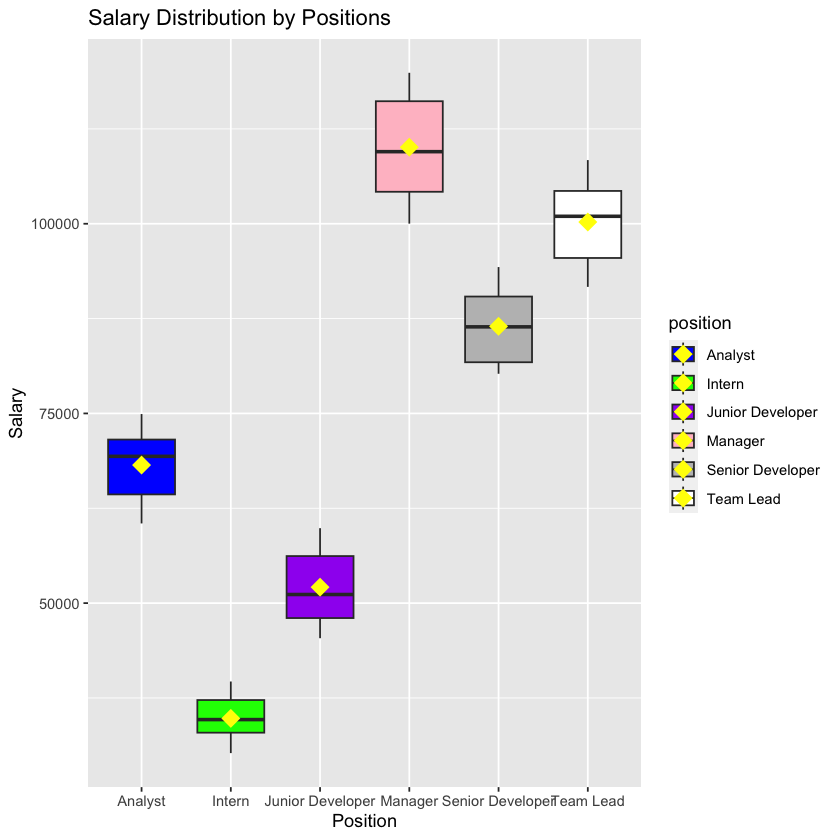

In [11]:
Salary_amongPostions_boxplot <- ggplot(employee, aes(x = position, y = salary,fill = position)) +
    geom_boxplot() +
    labs(x = "Position", y = "Salary", title = "Salary Distribution by Positions") +
    scale_fill_manual(values = c("Analyst" = "blue", "Intern" = "Green", "Junior Developer" = "purple", 
                                 "Manager" = "pink", "Senior Developer" = "Grey", "Team Lead" = "white")) +
    stat_summary(aes(position, salary, fill = position),
    fun = mean, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )
Salary_amongPostions_boxplot

**Analysis of Salary Distribution by Positions Boxplot**
Comparing to previous two boxplot. The side-by-side Boxplots of Salary of different Positions  shows that there is almost no overlapping among these positions which means there might be a strong association beween the salary and position. In the futrue analysis， the association between the position and salary should be analyed deeper.

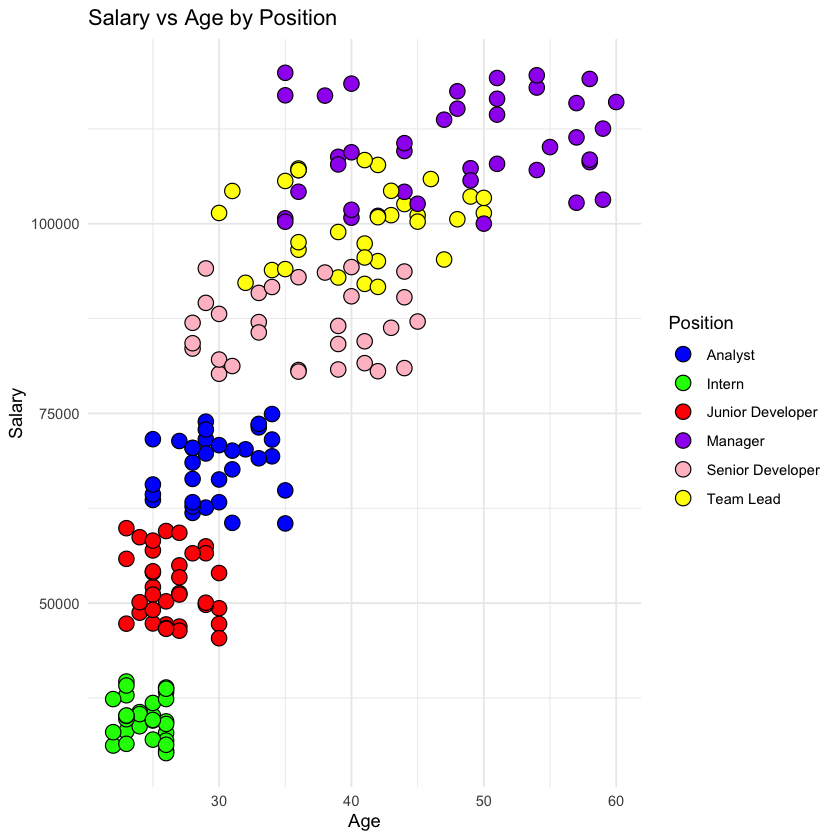

In [12]:
Salary_age_scatterplot <- ggplot(employee, aes(x = age, y = salary, fill = position)) +
  geom_point(shape = 21, size = 4, color = "black") +
  scale_fill_manual(values = c("blue", "green", "red", "purple", "pink", "yellow" )) +  # Adjust colors as needed
  labs(title = "Salary vs Age by Position",
       x = "Age",
       y = "Salary",
       fill = "Position") +
        theme_minimal()
Salary_age_scatterplot

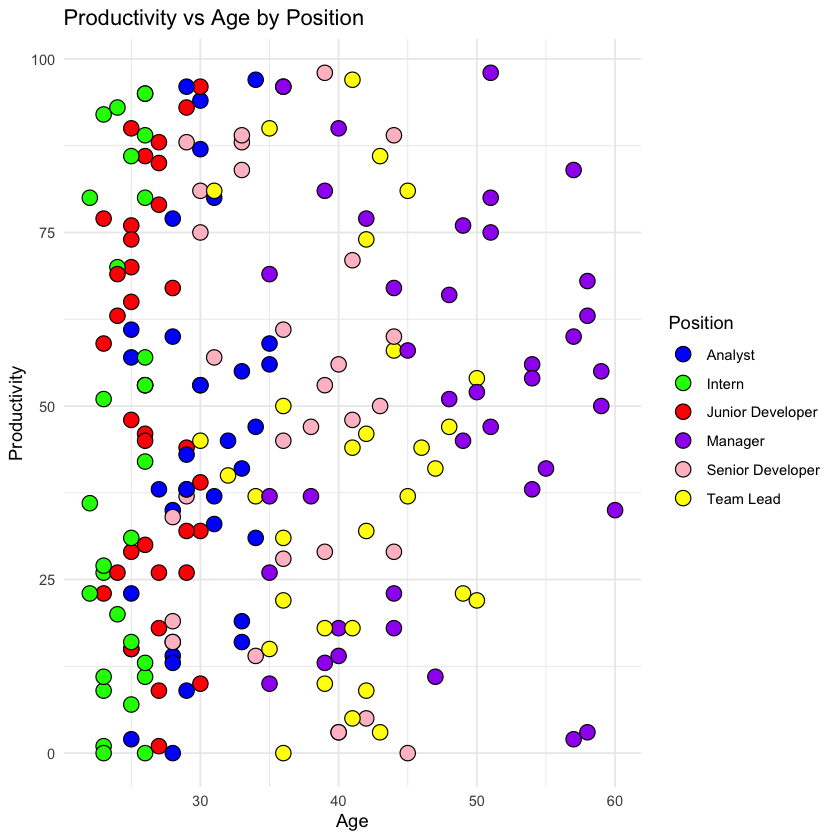

In [13]:
complete_age_scatterplot <- ggplot(employee, aes(x = age, y = productivity, fill = position)) +
  geom_point(shape = 21, size = 4, color = "black") +
  scale_fill_manual(values = c("blue", "green", "red", "purple", "pink", "yellow" )) +  # Adjust colors as needed
  labs(title = "Productivity vs Age by Position",
       x = "Age",
       y = "Productivity",
       fill = "Position") +
        theme_minimal()
complete_age_scatterplot

In [14]:

numeric_vars <- employee %>%
  select_if(is.numeric)

# Calculate the correlation matrix
cor_matrix <- round(cor(numeric_vars),2)
cor_matrix


,age,projects,productivity,satisfaction,feedback,salary
age,1.00,0.76,0.02,0.04,0.01,0.83
projects,0.76,1.00,0.06,-0.01,0.08,0.87
productivity,0.02,0.06,1.00,0.05,-0.01,0.03
satisfaction,0.04,-0.01,0.05,1.00,0.01,-0.02
feedback,0.01,0.08,-0.01,0.01,1.00,0.03
salary,0.83,0.87,0.03,-0.02,0.03,1.00


In [15]:
library(car)
vif(lm(salary~ projects + age, employee))

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode




projects      age 
2.353586 2.353586

### Method and Plan

#### Question of Interest
What is the impact of age, projects and other relevant features on the salary of employee?
Proposed Methods: Multiple Linear Regression, Logistic Regression, Stepwise Selection, Lasso Regression, Ridge Regression, Cross Validation.

#### 1. Data Preparation:
* Clean the dataset, removing the missing dataset.
* Transform categorical variables into int if needed.

#### 2. Exploratory Data Analysis (EDA):
* Conduct EDA to initially explore the relationship among the variables, identify the pattern among the variables such as linearity, and find out if there is a great difference in salary in different group in different categorical variables.
* Initially visualizing the data: 
1. Create the boxplot to compare the distribution of different groups in the categorical variables.
2. Using the correlation heat map to peak at the correlation between the variables.
3. Getting the scatter plot of different variables by using ggpairs.

#### 3. Multiple Linear Regression:

Fit a model to understand the linear relationship between asking prices and predictors.
Assess the significance and impact of each predictor variable.

#### 4. Stepwise Forward Selection:
After the exploratory data analysis, the analyzed predictor variables should be confirmed. Then the forward selection will be implemented with regsubsets() function.

#### 5. Regularization Penalty:
After each predictor variable is added, apply the regularization penalty() to each model. In some of the case the coefficients might be zero because of Lasso regression. We will use the Ridge Regression and Lasso Regression These two regression both help shrinking our model coefficients which address the multicollinearity between the variables. And in r we could use glmnet() function for Ridge and Lasso regression.

#### VIF
VIF is also a measure of the amount of multicollinearity in regression analysis.

VIF < 5: Low collinearity
5 < VIF < 10: Moderate collinearity
VIF > 10: High collinearity

#### 6. Cross-Validation:
Cross validation technique will be performed to evaluate the performance for the model of each step. That will help prevent the overfitting situation and ensures the model fitting well the data. Our data will be split into 4 sets. One by one, each set will be selected as the test set and remaining will be used as training data. And finally the testing set with best parameter will be used to fit the model.

#### Limitation: 
There are overfitting risks arising from the combination of regression techniques, multicollinearity, and stepwise selection. Additionally, stepwise forward selection biases and potential loss of interpretability in Ridge and Lasso regression are concerns. And there are some assumption of linear model which are needed to be considered in the model fitting such as linearity, independece, homoscedasticity and constant variance...

### Pre-steps of Assignment4

In [16]:
head(numeric_vars)
head(employee)

,age,projects,productivity,satisfaction,feedback,salary
,<int>,<int>,<int>,<int>,<dbl>,<int>
1,25,11,57,25,4.7,63596
2,59,19,55,76,2.8,112540
3,30,8,87,10,2.4,66292
4,26,1,53,4,1.4,38303
5,43,14,3,9,4.5,101133
6,24,5,63,33,4.2,48740


,name,age,gender,projects,productivity,satisfaction,feedback,department,position,joiningdate,salary
,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
2,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
3,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
4,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
5,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
6,Jonathan King,24,Male,5,63,33,4.2,Sales,Junior Developer,Jan-21,48740


In [17]:
employee$gender <- ifelse(employee$gender == "Male", 1, 0)

In [18]:
head(employee)

,name,age,gender,projects,productivity,satisfaction,feedback,department,position,joiningdate,salary
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,Douglas Lindsey,25,1,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
2,Anthony Roberson,59,0,19,55,76,2.8,IT,Manager,Jan-99,112540
3,Thomas Miller,30,1,8,87,10,2.4,IT,Analyst,Jan-17,66292
4,Joshua Lewis,26,0,1,53,4,1.4,Marketing,Intern,Jan-22,38303
5,Stephanie Bailey,43,1,14,3,9,4.5,IT,Team Lead,Jan-05,101133
6,Jonathan King,24,1,5,63,33,4.2,Sales,Junior Developer,Jan-21,48740


In [24]:
install.packages(c('glmnet', 'rsample'))

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’





The downloaded binary packages are in
	/var/folders/69/n41lhlxd7zz7y66vhl2v1hcm0000gn/T//Rtmpa8xNVS/downloaded_packages


In [25]:
# Lasso
library(rsample)
library(glmnet)
library(car)
employee_raw <- employee %>%
                select(-name, -joiningdate, -department, -position)

employee_split <- initial_split(employee_raw, prop = .6, strata = salary)
employee_selection <- training(employee_split)
employee_inference <- testing(employee_split)

lasso_model <-
    cv.glmnet(employee_selection %>% select(-salary) %>% as.matrix(), 
              employee_selection %>% select(salary) %>% as.matrix(), 
              alpha = 1)

lasso_model
beta_lasso <- coef(lasso_model, s = "lambda.min")
beta_lasso

lasso_selected_covariates <- as_tibble(
        as.matrix(beta_lasso),
        rownames='covariate') %>%
        filter(covariate != '(Intercept)' & abs(s1) !=0) %>% 
        pull('covariate')

lasso_selected_covariates

lasso_variables_vif <- 
   vif(lm(salary ~age + projects + gender, employee_selection))

lasso_variables_vif
inference_model <- lm(lm(salary ~age + projects, employee_inference))
summary(inference_model)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8




Call:  cv.glmnet(x = employee_selection %>% select(-salary) %>% as.matrix(),      y = employee_selection %>% select(salary) %>% as.matrix(),      alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index   Measure       SE Nonzero
min    665    39 134533270 14418343       4
1se   3551    21 148506767 16205050       2

7 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  11565.657064
age           1084.760907
gender        3003.064156
projects      2383.591900
productivity    -8.634741
satisfaction     .       
feedback         .       

[1] "age"          "gender"       "projects"     "productivity"

age projects   gender 
2.291969 2.292779 1.015657


Call:
lm(formula = lm(salary ~ age + projects, employee_inference))

Residuals:
     Min       1Q   Median       3Q      Max 
-19836.4  -8267.0    -85.2   7216.2  25242.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9079.9     4507.4   2.014   0.0475 *  
age           1127.5      178.8   6.305 1.66e-08 ***
projects      2370.3      272.9   8.687 4.82e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10500 on 77 degrees of freedom
Multiple R-squared:  0.8632,	Adjusted R-squared:  0.8596 
F-statistic: 242.9 on 2 and 77 DF,  p-value: < 2.2e-16


In [52]:
install.packages("Metrics")

# 加载Metrics包
library(Metrics)


The downloaded binary packages are in
	/var/folders/69/n41lhlxd7zz7y66vhl2v1hcm0000gn/T//Rtmpa8xNVS/downloaded_packages


In [63]:
s <- employee_selection %>% select(-salary) %>% select(-feedback,-satisfaction, -productivity)
lasso_model0 <-  lm(salary ~age + projects + gender, data = employee_selection)
s_pred <- predict(lasso_model0, s)
s<- employee_selection %>% select(salary) 
s <- as.numeric(s$salary)
mse(s, s_pred)

[1] 123221437

In [31]:
lasso_selected_covariates


[1] "age"          "gender"       "projects"     "productivity"


Call:
lm(formula = salary ~ age + projects + gender, data = employee_inference)

Coefficients:
(Intercept)          age     projects       gender  
       8233         1190         2248         2343  


In [26]:
head(employee)
employee_for <- employee %>%
                select(-name, -joiningdate, -department, -position)
training_employee <- sample_n(employee_for, size = nrow(employee_for) * 0.70,
  replace = FALSE
)
testing_employee <- anti_join(employee_for,
  training_employee
)
head(training_employee)
head(testing_employee)


# Calculate the correlation matrix
cor_matrix <- round(cor(employee_for),2)
cor_matrix


,name,age,gender,projects,productivity,satisfaction,feedback,department,position,joiningdate,salary
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,Douglas Lindsey,25,1,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
2,Anthony Roberson,59,0,19,55,76,2.8,IT,Manager,Jan-99,112540
3,Thomas Miller,30,1,8,87,10,2.4,IT,Analyst,Jan-17,66292
4,Joshua Lewis,26,0,1,53,4,1.4,Marketing,Intern,Jan-22,38303
5,Stephanie Bailey,43,1,14,3,9,4.5,IT,Team Lead,Jan-05,101133
6,Jonathan King,24,1,5,63,33,4.2,Sales,Junior Developer,Jan-21,48740


Joining with `by = join_by(age, gender, projects, productivity, satisfaction,
feedback, salary)`


,age,gender,projects,productivity,satisfaction,feedback,salary
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
1,36,1,12,22,66,2.2,107279
2,28,1,5,14,15,1.2,61891
3,34,1,11,97,32,1.0,74918
4,59,0,20,50,85,1.9,103172
5,35,1,18,90,0,3.7,105640
6,26,1,2,89,78,3.6,34412


,age,gender,projects,productivity,satisfaction,feedback,salary
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
1,30,1,8,87,10,2.4,66292
2,43,1,14,3,9,4.5,101133
3,33,0,13,41,39,2.3,73502
4,39,0,17,10,15,1.1,92915
5,25,0,2,15,97,1.8,35169
6,29,1,18,88,8,1.8,89571


,age,gender,projects,productivity,satisfaction,feedback,salary
age,1.00,-0.08,0.76,0.02,0.04,0.01,0.83
gender,-0.08,1.00,-0.08,0.13,-0.05,-0.11,-0.01
projects,0.76,-0.08,1.00,0.06,-0.01,0.08,0.87
productivity,0.02,0.13,0.06,1.00,0.05,-0.01,0.03
satisfaction,0.04,-0.05,-0.01,0.05,1.00,0.01,-0.02
feedback,0.01,-0.11,0.08,-0.01,0.01,1.00,0.03
salary,0.83,-0.01,0.87,0.03,-0.02,0.03,1.00


In [27]:
library(leaps)
employee_forward_sel <- regsubsets(
  salary~., nvmax = 6 ,
  data = training_employee,
  method = "forward"
)
employee_fwd_summary <- summary(employee_forward_sel)
employee_fwd_summary
employee_fwd_summary <- tibble(
   n_input_variables = 1:6,
   RSS = employee_fwd_summary$rss,
   BIC = employee_fwd_summary$bic,
   Cp = employee_fwd_summary$cp
)
employee_fwd_summary
cp_min = which.min(employee_fwd_summary$Cp)
cp_min
names(coef(employee_forward_sel, cp_min))
selected_var <- names(coef(employee_forward_sel, cp_min))[-1]
selected_var

Subset selection object
Call: regsubsets.formula(salary ~ ., nvmax = 6, data = training_employee, 
    method = "forward")
6 Variables  (and intercept)
             Forced in Forced out
age              FALSE      FALSE
gender           FALSE      FALSE
projects         FALSE      FALSE
productivity     FALSE      FALSE
satisfaction     FALSE      FALSE
feedback         FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: forward
         age gender projects productivity satisfaction feedback
1  ( 1 ) " " " "    "*"      " "          " "          " "     
2  ( 1 ) "*" " "    "*"      " "          " "          " "     
3  ( 1 ) "*" "*"    "*"      " "          " "          " "     
4  ( 1 ) "*" "*"    "*"      "*"          " "          " "     
5  ( 1 ) "*" "*"    "*"      "*"          "*"          " "     
6  ( 1 ) "*" "*"    "*"      "*"          "*"          "*"     

n_input_variables,RSS,BIC,Cp
<int>,<dbl>,<dbl>,<dbl>
1,26970984693,-184.2533,59.908296
2,19651533247,-223.6365,8.742226
3,18816722664,-224.7722,4.678438
4,18420168537,-222.8125,3.798001
5,18311167529,-218.7018,5.006253
6,18310306619,-213.7667,7.000000


[1] 4

[1] "(Intercept)"  "age"          "gender"       "projects"     "productivity"

[1] "age"          "gender"       "projects"     "productivity"

# Assignment 4 Computational Code and Output

## Implementation of a proposed model"

In [28]:
employee_raw <- employee %>%
                select(-name, -joiningdate, -department, -position)

employee_split <- initial_split(employee_raw, prop = .6, strata = salary)
employee_selection <- training(employee_split)
employee_inference <- testing(employee_split)

lasso_model <-
    cv.glmnet(employee_selection %>% select(-salary) %>% as.matrix(), 
              employee_selection %>% select(salary) %>% as.matrix(), 
              alpha = 1)

lasso_model
beta_lasso <- coef(lasso_model, s = "lambda.min")
beta_lasso

lasso_selected_covariates <- as_tibble(
        as.matrix(beta_lasso),
        rownames='covariate') %>%
        filter(covariate != '(Intercept)' & abs(s1) !=0) %>% 
        pull('covariate')

lasso_selected_covariates

lasso_variables_vif <- 
   vif(lm(salary ~age + projects + gender, employee_selection))

lasso_variables_vif
inference_model <- lm(salary ~age + projects + gender, employee_inference)
inference_model_summary <- summary(inference_model)


Call:  cv.glmnet(x = employee_selection %>% select(-salary) %>% as.matrix(),      y = employee_selection %>% select(salary) %>% as.matrix(),      alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index   Measure       SE Nonzero
min  750.3    38 134152304 13231993       4
1se 3028.8    23 145931520 15136123       2

7 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  11638.577246
age           1022.139221
gender        2637.155417
projects      2489.805154
productivity    -0.670844
satisfaction     .       
feedback         .       

[1] "age"          "gender"       "projects"     "productivity"

age projects   gender 
2.389320 2.389333 1.005532

## Result

In [29]:
tidy(inference_model_summary)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8233.324,5200.8801,1.583064,1.175598e-01
age,1189.762,196.9549,6.040783,5.273238e-08
projects,2248.431,270.4743,8.312919,2.768817e-12
gender,2342.527,2413.6574,0.970530,3.348611e-01


### The Interpretation of Result.
The result above is derived from lasso regression on the training set and applied to the inference set, predicts salary based on age, projects, and gender. The coefficients suggest that, on average ,for constant other variables, each additional year of age is associated with a salary increase of 1014.513 unit, and each additional completed project is associated with a salary increase of 2664.665 unit. This is just as expected, it is shown in the previous part that the correlation between age and salary and the correlation between projects and salary are relatively high compared to other variables. Surprisingly, the p-value of gender is 2.45e-05(less than .05) implying that the gender is statistically significant to the response variable salary, contrary to initial expectations from exploratory data analysis (EDA).